# Homework Assignment 1

## Data analysis

In this assignment, one must:

1. Describe your data and their features.

2. Perform an unconditional mono-variate analysis.

3. Perform a class-conditional mono-variate analysis.

4. Perform an unconditional bi-variate analysis of the predictors.

5. Perform an unconditional multi-variate analysis of the predictors.

## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import numpy as np


In [2]:
pd.options.display.max_columns = None

sns.set_theme(style='darkgrid')
sns.set_palette("twilight_shifted")

## Reading Database

In [3]:
data = pd.read_csv("../../data/external/Agregado-20241114133303.csv", 
                   encoding="latin-1",
                   sep=";")

print(data.shape)
data.head()

(659, 229)


,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de Serviço,Natureza Jurídica,G05A - Quantidade total de municípios atendidos com abastecimento de água,G05B - Quantidade total de municípios atendidos com esgotamento sanitário,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",GE001 - Quantidade de municípios atendidos com abastecimento de água com delegação em vigor,GE002 - Quantidade de municípios atendidos com abastecimento de água com delegação vencida,GE003 - Quantidade de municípios atendidos com abastecimento de água sem delegação,GE005 - Quantidade total de municípios atendidos,GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água,GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário,GE010 - Quantidade de Localidades (excluídas as sedes) atendidas com abastecimento de água,GE011 - Quantidade de Localidades (excluídas as sedes) atendidas com esgotamento sanitário,GE014 - Quantidade de municípios atendidos com esgotamento sanitário com delegação em vigor,GE015 - Quantidade de municípios atendidos com esgotamento sanitário com delegação vencida,GE016 - Quantidade de municípios atendidos com esgotamento sanitário sem delegação,GE017 - Ano de vencimento da delegação de abastecimento de água,GE018 - Ano de vencimento da delegação de esgotamento sanitário,"GE025 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação em vigor","GE026 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação vencida para prestar esses serviços","GE028 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação em vigor para prestar esses serviços","GE029 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação vencida para prestar esses serviços",AG001 - População total atendida com abastecimento de água,AG001A - População total atendida com abastecimento de água no ano anterior ao de referência.,AG002 - Quantidade de ligações ativas de água,AG002A - Quantidade de ligações ativas de água no ano anterior ao de referência.,AG003 - Quantidade de economias ativas de água,AG003A - Quantidade de economias ativas de água no ano anterior ao de referência.,AG004 - Quantidade de ligações ativas de água micromedidas,AG004A - Quantidade de ligações ativas de água micromedidas no ano anterior ao de referência.,AG005 - Extensão da rede de água,AG005A - Extensão da rede de água no ano anterior ao de referência.,AG006 - Volume de água produzido,AG007 - Volume de água tratada em ETAs,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,AG011 - Volume de água faturado,AG012 - Volume de água macromedido,AG013 - Quantidade de economias residenciais ativas de água,AG013A - Quantidade de economias residenciais ativas de água no ano anterior ao de referência.,AG014 - Quantidade de economias ativas de água micromedidas,AG014A - Quantidade de economias ativas de água micromedidas no ano anterior ao de referência.,AG015 - Volume de água tratada por simples desinfecção,AG016 - Volume de água bruta importado,AG017 - Volume de água bruta exportado,AG018 - Volume de água tratada importado,AG019 - Volume de água tratada exportado,AG020 - Volume micromedido nas economias residenciais ativas de água,AG021 - Quantidade de ligações totais de água,AG021A - Quantidade de ligações totais de água no ano anterior ao de referência.,AG022 - Quantidade de economias residenciais ativas de água micromedidas,AG022A - Quantidade de economias residenciais ativas de água micromedidas no ano anterior ao de referência.,AG024 - Volume de serviço,AG025A - População

In [4]:
selected_cols = ["Município", "Ano de Referência", "Sigla do Prestador", 
                 "Abrangência", "Tipo de Serviço", "Natureza Jurídica",
                 "IN022 - Consumo médio percapita de água", "IN023 - Índice de atendimento urbano de água", 
                 "IN055 - Índice de atendimento total de água", 
                 "G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE"]

dim_municipio = data[["Código do Município", "Município"]].drop_duplicates()
dim_prestadores = data[["Código do Prestador", "Prestador", "Sigla do Prestador"]].drop_duplicates()

In [5]:
columns_new_names = {
    'Município': "nm_municipio",
    'Ano de Referência': "ano",
    'Sigla do Prestador': "sg_prestador",
    'Abrangência': "abrangencia",
    'Tipo de Serviço': "tipo_servico",
    'Natureza Jurídica': "nat_juridica",
    'IN022 - Consumo médio percapita de água': "IN022",
    'IN023 - Índice de atendimento urbano de água': "IN023",
    'IN055 - Índice de atendimento total de água': "IN055",
    'G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE': "G12A"
}

numerical_columns = ["ano", "IN022", "IN023", "IN055", "G12A"]
categorical_columns = ["consumption_bands", "sg_prestador", "abrangencia", "tipo_servico", "nat_juridica"]

In [6]:
def get_consumption_bands(in022: float):
    if np.isnan(in022):
        return np.nan
    elif in022 <= 50:
        return "Critic low"
    elif in022 > 50 and in022 <= 100:
        return "Low"
    elif in022 > 100 and in022 <= 150:
        return "Moderate"
    elif in022 > 150 and in022 <= 200:
        return "Moderate to High"
    else:
        return "Very High"



In [ ]:
df = (data[selected_cols]
      .query("`Ano de Referência` != '---'")
      .rename(columns=columns_new_names))

df["tipo_servico"] = df["tipo_servico"].str.rstrip()
df[numerical_columns] = df.agg(
    {
        "ano": int,
        "IN022": lambda x: x.str.replace(",", ".").astype(float), 
        "IN023": lambda x: x.str.replace(",", ".").astype(float), 
        "IN055": lambda x: x.str.replace(",", ".").astype(float), 
        "G12A": lambda x: x.str.replace(".", "").astype(float)
    }
    )

df["consumption_bands"] = df["IN022"].apply(get_consumption_bands)
                           
df.drop(columns=["IN022"], 
        inplace=True)


/tmp/ipykernel_21831/3641535513.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  "G12A": lambda x: x.str.replace(".", "").astype(float)


##  1 Describe your data and their features
1 Describe your data and their features in terms of number of observations $N$, number of predictor variables $D$, number of classes $L$ and class-distribution (that is, the number of observations for each of the classes).

In [8]:
# number of observations
n_observations = len(df)
print("Number of observations (N):", n_observations)

Number of observations (N): 658


In [9]:
n_variables = len(numerical_columns)
print("Number of predictor variables (D):", n_variables)

Number of predictor variables (D): 5


In [26]:
n_cat_var = len(categorical_columns)
print("Number of categorical variables (D_cat):", n_cat_var)

Number of categorical variables (D_cat): 5


In [11]:
n_classes = len(df["consumption_bands"].unique())
print("Number of classes (L):", n_classes)

Number of classes (L): 6


In [12]:
def describe_class(df: pd.DataFrame, col_name: str, col_description: str) -> None:
    L = len(df[col_name].unique())
    description_str = "\n".join(
        [
            f"\nThe column '{col_description}' has {L} categories",
            f"Observations per category:\n{df[col_name].value_counts()}"
        ])
    
    return description_str


In [13]:
# Class distribution
for desc, col_name in columns_new_names.items():
    if col_name in categorical_columns:
        print(describe_class(df, col_name, desc))


The column 'Sigla do Prestador' has 40 categories
Observations per category:
SAAE               391
CAGECE              28
PMI                 25
PMA                 20
PMG                 20
SAAEC               19
SAMAE               16
PMM                 14
PMP                 13
PMVC                13
PMVA                11
PMS                 11
SAAJ                10
PMC                  8
PMU                  8
PMBV                 6
PMJ                  5
PMDIP                5
SAEBES               4
PMSQ                 4
PMLM                 3
PMAN                 3
PMNO                 2
PMSP                 2
PMSLC                2
PMSA                 1
PMT                  1
SISAR BAC            1
PMSC                 1
SISAR BAJ            1
SISAR BBJ            1
SISAR BBA            1
PMQ                  1
PMO                  1
SISAR BCL            1
SISAR BME            1
PME                  1
Ambiental Crato      1
SISAR BPA            1
SISAR BSA            1
Na

In [33]:
target_col = "consumption_bands"
print("#"*80)
s = f" Class-distribution for the Variable of interest | {target_col} "
print(f"{s:#^80}")
print("#"*80)
print(describe_class(df, target_col, 'Faixas de consumos de água por habitante - IN022'))

################################################################################
##### Class-distribution for the Variable of interest | consumption_bands ######
################################################################################

The column 'Faixas de consumos de água por habitante - IN022' has 6 categories
Observations per category:
Moderate            236
Low                 158
Very High            55
Moderate to High     51
Critic low           11
Name: consumption_bands, dtype: int64


## 2. Perform an unconditional mono-variate analysis.

Perform an unconditional mono-variate analysis of each of the $D$ predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their (unconditional) mean $\mu_d$, standard deviation $\sigma_d$ and skewness $\gamma_d$, with $d = 1,...,D$ using all the N observations.

In [14]:
df.describe().loc[["count", "mean", "std"]]

,ano,IN022,IN023,IN055,G12A
count,658.000000,511.000000,487.000000,505.000000,6.550000e+02
mean,2013.500000,128.615127,94.563922,72.455366,3.191847e+05
std,6.345518,63.988941,12.421802,21.967399,1.333600e+06


$$\gamma_d = \frac{\sum_{i=1}^N (X_i - \overline{X})^3}{(N-1)* \sigma^3}$$

In [15]:
def skewness(df, col):
    N = len(df[col].dropna())
    x_hat = df[col].dropna().mean()
    std = df[col].dropna().std()

    skew = df[col].apply(lambda x: (x-x_hat)**3).sum()/((N-1)*std**3)

    return skew

def skew(X):
    _X = X[~np.isnan(X)]
    N = len(_X)
    x_hat = np.mean(_X)
    std = np.std(_X)

    skew = np.sum(np.fromiter(((x-x_hat)**3 for x in _X), float))/((N-1)*std**3)

    return skew   

In [16]:
s_size = 20
for col in numerical_columns:
    _str = f"{col}: {skew(df[col]):.6f}"
    print(_str)


ano: -0.549990
IN022: 2.335619
IN023: -4.459329
IN055: -0.395712
G12A: 4.913328


In [17]:
# Pandas built-in method
df.skew()

/tmp/ipykernel_21831/1729400447.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


ano     -0.550409
IN022    2.337917
IN023   -4.463933
IN055   -0.396106
G12A     4.917095
dtype: float64

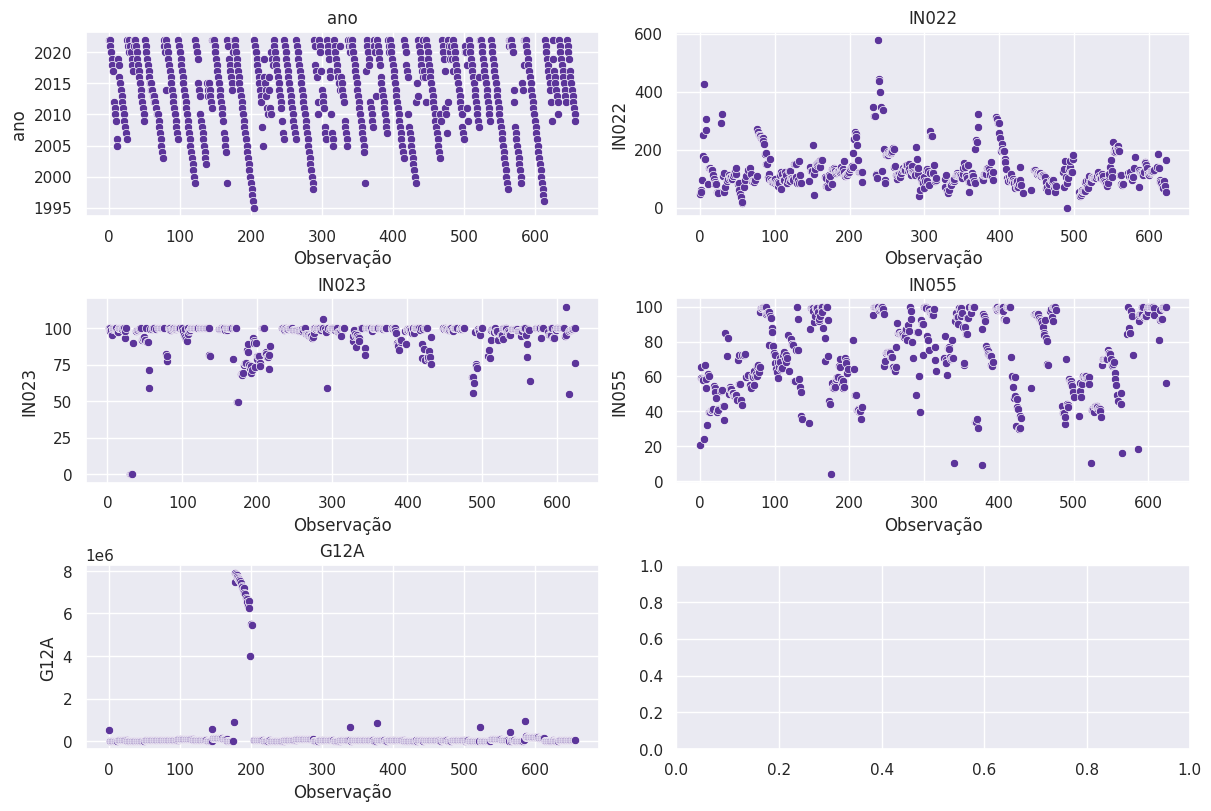

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(12,8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
# plt.suptitle("Histograma das variáveis numéricas")
for ax, col in zip(axs.flatten(), numerical_columns):
    sns.scatterplot(
        x=df[col].index,
        y=df[col],
        ax=ax
    )

    ax.set(title=f"{col}")
    ax.set_xlabel("Observação", fontsize=12)
    ax.set_ylabel(col, fontsize=12)


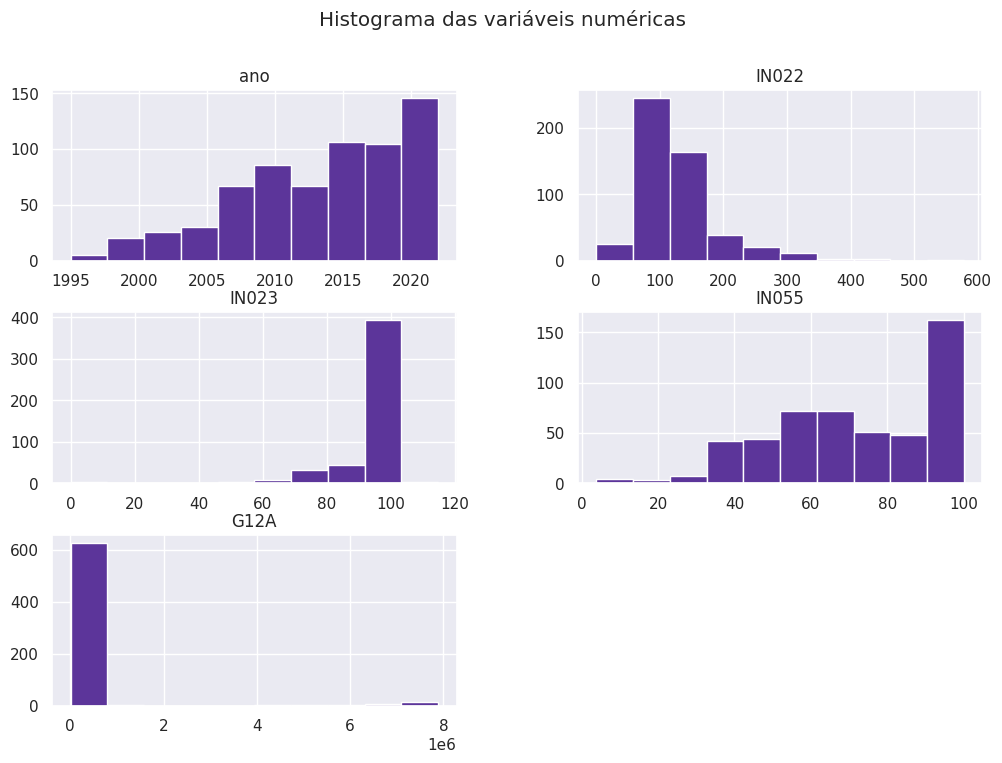

In [19]:
df.hist(figsize=(12,8))
plt.suptitle("Histograma das variáveis numéricas")
plt = plt

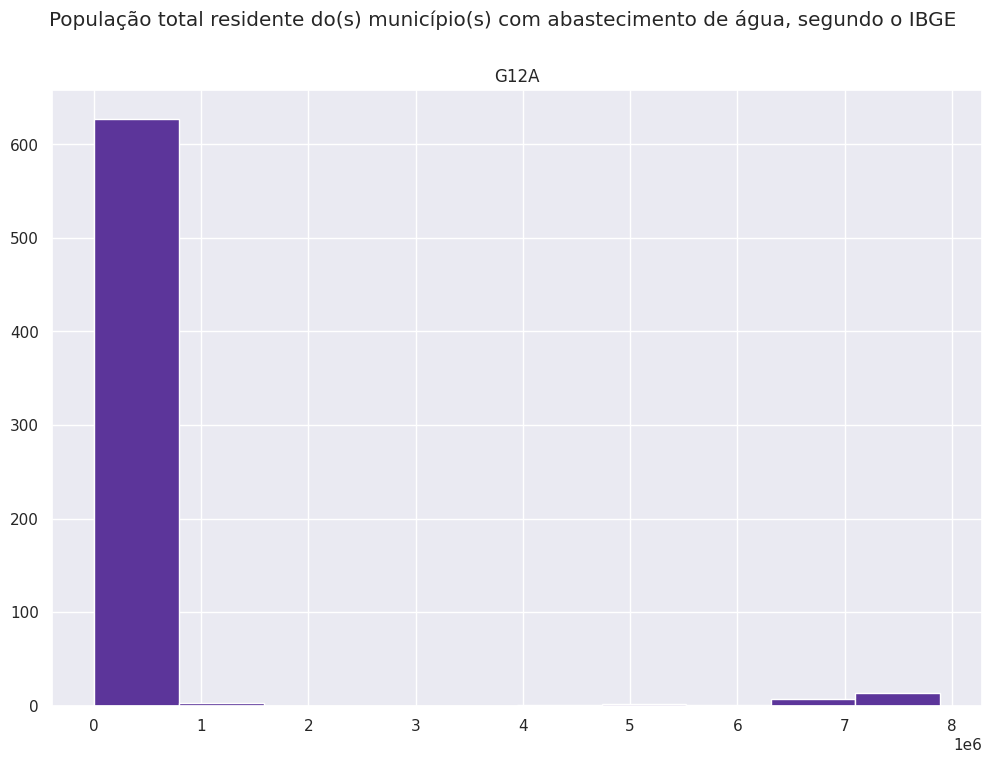

In [20]:
# Visualizing the histogram of column G12A with higher definition
df[["G12A"]].hist(figsize=(12,8))
plt.suptitle("População total residente do(s) município(s) com abastecimento de água, segundo o IBGE")

plt = plt

## 3. Perform a class-conditional mono-variate analysis.
Perform a class-conditional mono-variate analysis of each of the predictors. Again, you must plot their (class-conditional) histograms and box-plots, calculate their (class-conditional) mean $\mu_{d|l}$, standard deviation $\sigma_{d|l}$ and skewness $\gamma_{d|l}$ , with $d = 1,..., D$, now using only the $N_l$ observations of class $l$, for each the $L$ classes.

In [21]:
def class_conditional_analysis(df: pd.DataFrame, col_name: str, category: str) -> None:
    _df = df.query(f"{col_name} == '{category}'")

    print("#"*80)
    s = f" Conditional mono-variate analysis | {col_name} = {category} "
    print(f"{s:#^80}")
    print("#"*80, "\n")
    description = _df.describe().loc[["count", "mean", "std"]]
    s = " Descriptive Statistic "
    print(f"{s:#^80}")
    print(description, "\n")
    
    skew = _df.skew()
    s = " Skewnes "
    print(f"{s:#^80}")
    print(skew, "\n")


    _df.hist(figsize=(12,8))
    plt.suptitle(f"Class-conditional histogram | {col_name} = {category}")



In [22]:
df["consumption_bands"].unique()


array(['Critic low', 'Low', 'Moderate to High', 'Very High', nan,
       'Moderate'], dtype=object)

In [23]:
# class_conditional_analysis(df, "tipo_servico", "Água")
# class_conditional_analysis(df, "tipo_servico", "Água e Esgoto")
# class_conditional_analysis(df, "tipo_servico", "Esgoto")

df.groupby("consumption_bands").agg({
    "IN022": (np.mean, np.std, skew),
    "IN023": (np.mean, np.std, skew),
    "IN055": (np.mean, np.std, skew),
    "G12A": (np.mean, np.std, skew)
    })

IN022                           IN023             \
                         mean        std      skew       mean        std   
consumption_bands                                                          
Critic low          35.058182  15.997122 -1.277765  81.958000  15.464063   
Low                 82.097468  13.506012 -0.838011  96.067883  11.013752   
Moderate           120.556525  12.337955  0.430433  93.627973  13.250158   
Moderate to High   173.392353  15.712044  0.125894  95.800400   8.765210   
Very High          274.017091  73.329641  1.929917  95.455510  14.905804   

                                 IN055                                G12A  \
                       skew       mean        std      skew           mean   
consumption_bands                                                            
Critic low        -0.334538  56.764000  18.912775 -0.061941   86767.636364   
Low               -5.800899  68.600641  21.836502 -0.512218   70372.025316   
Moderate          -3.942393  74.222851  21.010288 -0.346181  769663.605150   
Moderate to High  -3.035934  78.127917  18.333300 -0.486553  204158.352941   
Very High         -5.712368  75.541455  25.414693 -0.417094   43317.836364   

                                           
                            std      skew  
consumption_bands                          
Critic low         1.396276e+05  2.838038  
Low                1.458606e+05  4.767743  
Moderate           2.116099e+06  2.701225  
Moderate to High   9.593874e+05  7.048049  
Very High          2.313424e+04  0.790797

################################################################################
###### Conditional mono-variate analysis | consumption_bands = Critic low ######
################################################################################ 

############################ Descriptive Statistic #############################
               ano      IN022      IN023      IN055           G12A
count    11.000000  11.000000  10.000000  10.000000      11.000000
mean   2016.545455  35.058182  81.958000  56.764000   86767.636364
std       6.154082  15.997122  15.464063  18.912775  139627.618957 

################################### Skewnes ####################################
ano     -2.669979
IN022   -1.353668
IN023   -0.357042
IN055   -0.066108
G12A     3.006626
dtype: float64 

################################################################################
######### Conditional mono-variate analysis | consumption_bands = Low ##########
######################################################

/tmp/ipykernel_21831/1685927193.py:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = _df.skew()
/tmp/ipykernel_21831/1685927193.py:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = _df.skew()


################################################################################
### Conditional mono-variate analysis | consumption_bands = Moderate to High ###
################################################################################ 

############################ Descriptive Statistic #############################
               ano       IN022     IN023      IN055           G12A
count    51.000000   51.000000  50.00000  48.000000      51.000000
mean   2011.588235  173.392353  95.80040  78.127917  204158.352941
std       5.561210   15.712044   8.76521  18.333300  959387.407256 

################################### Skewnes ####################################
ano     -0.547936
IN022    0.127197
IN023   -3.068034
IN055   -0.491924
G12A     7.121029
dtype: float64 

################################################################################
###### Conditional mono-variate analysis | consumption_bands = Very High #######
######################################################

/tmp/ipykernel_21831/1685927193.py:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = _df.skew()
/tmp/ipykernel_21831/1685927193.py:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = _df.skew()


################################################################################
####### Conditional mono-variate analysis | consumption_bands = Moderate #######
################################################################################ 

############################ Descriptive Statistic #############################
               ano       IN022       IN023       IN055          G12A
count   236.000000  236.000000  222.000000  221.000000  2.330000e+02
mean   2012.254237  120.556525   93.627973   74.222851  7.696636e+05
std       6.565139   12.337955   13.250158   21.010288  2.116099e+06 

################################### Skewnes ####################################
ano     -0.491607
IN022    0.431355
IN023   -3.951383
IN055   -0.346974
G12A     2.707091
dtype: float64 



/tmp/ipykernel_21831/1685927193.py:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = _df.skew()


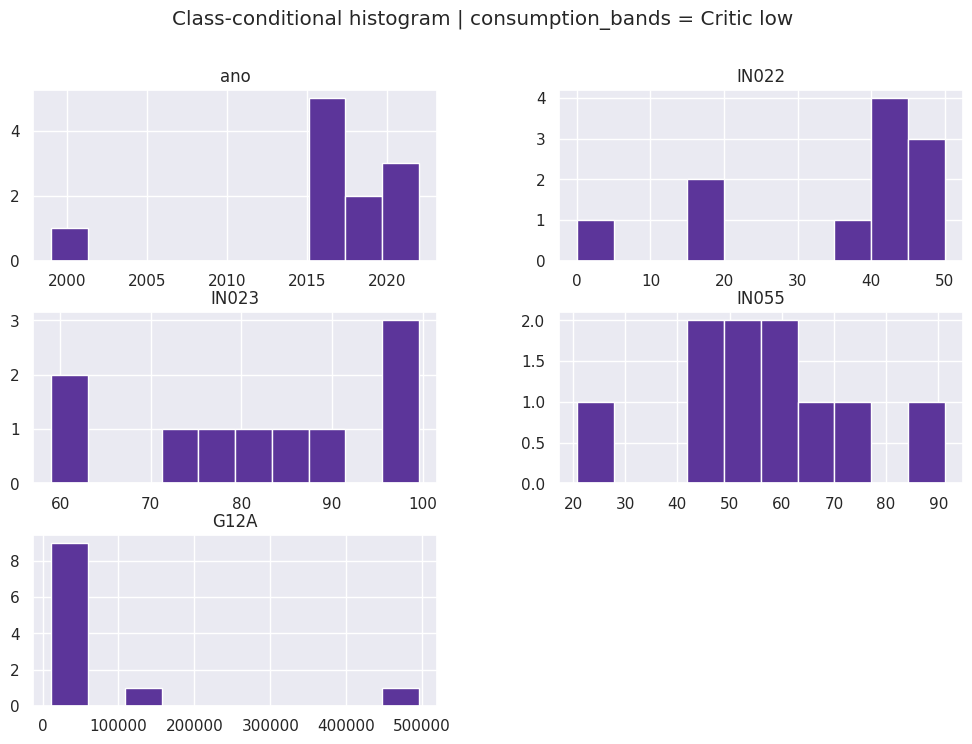

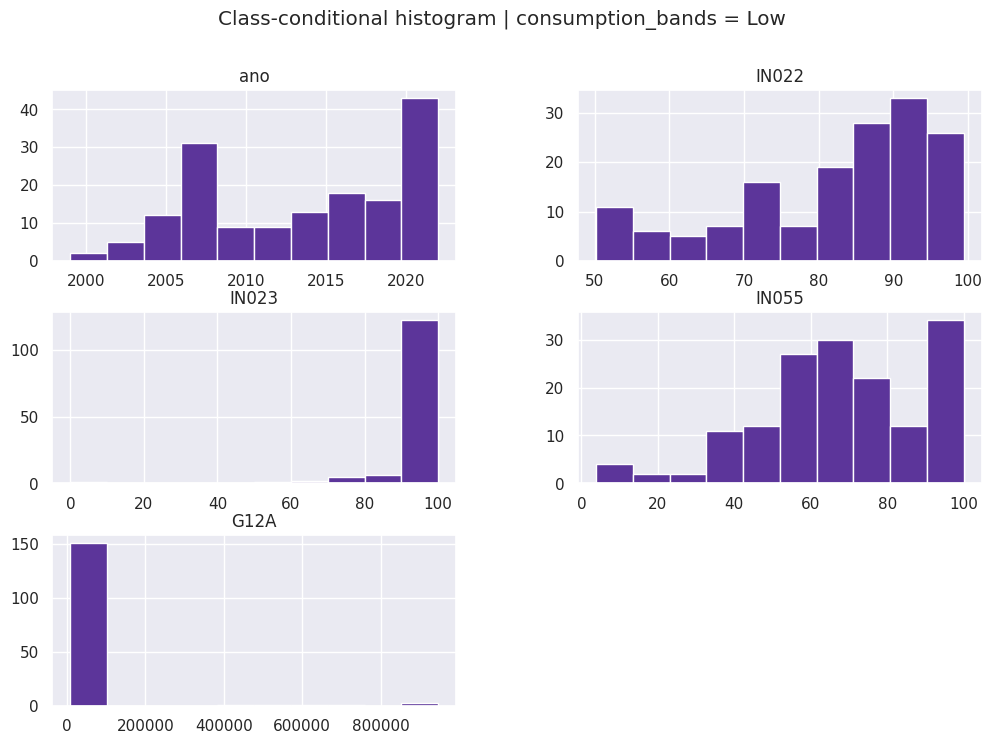

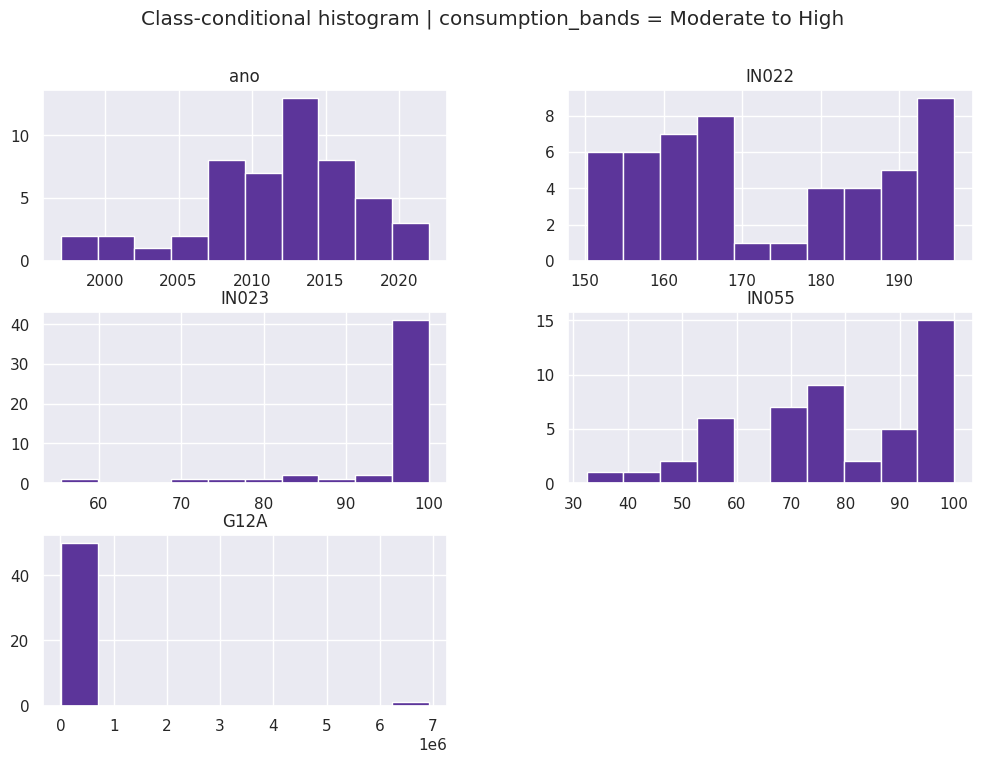

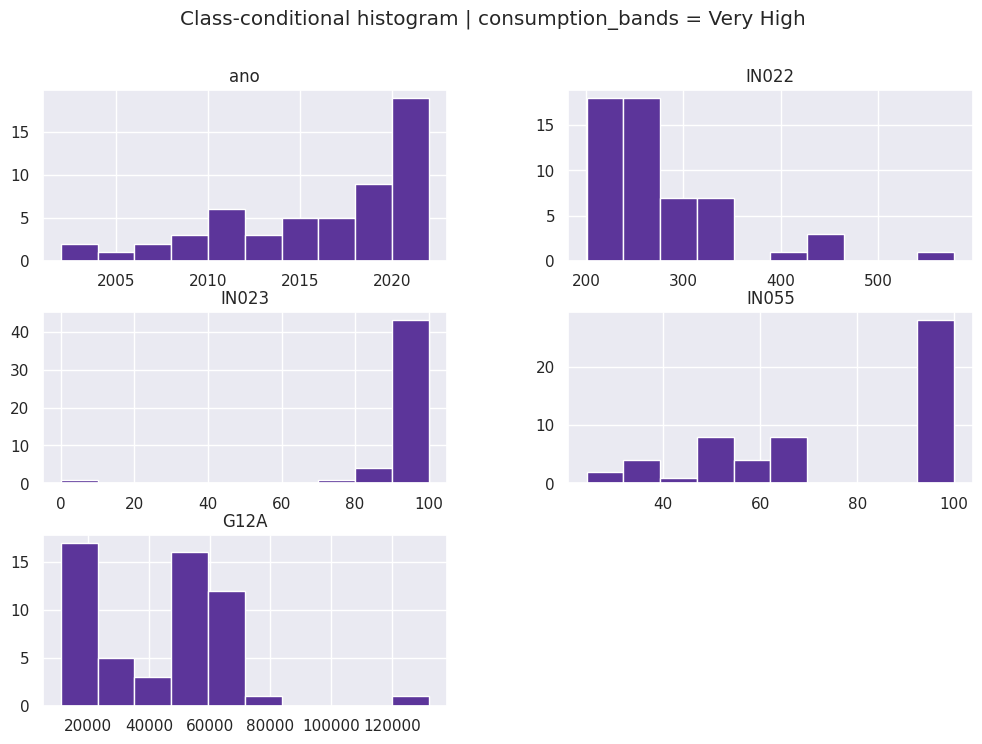

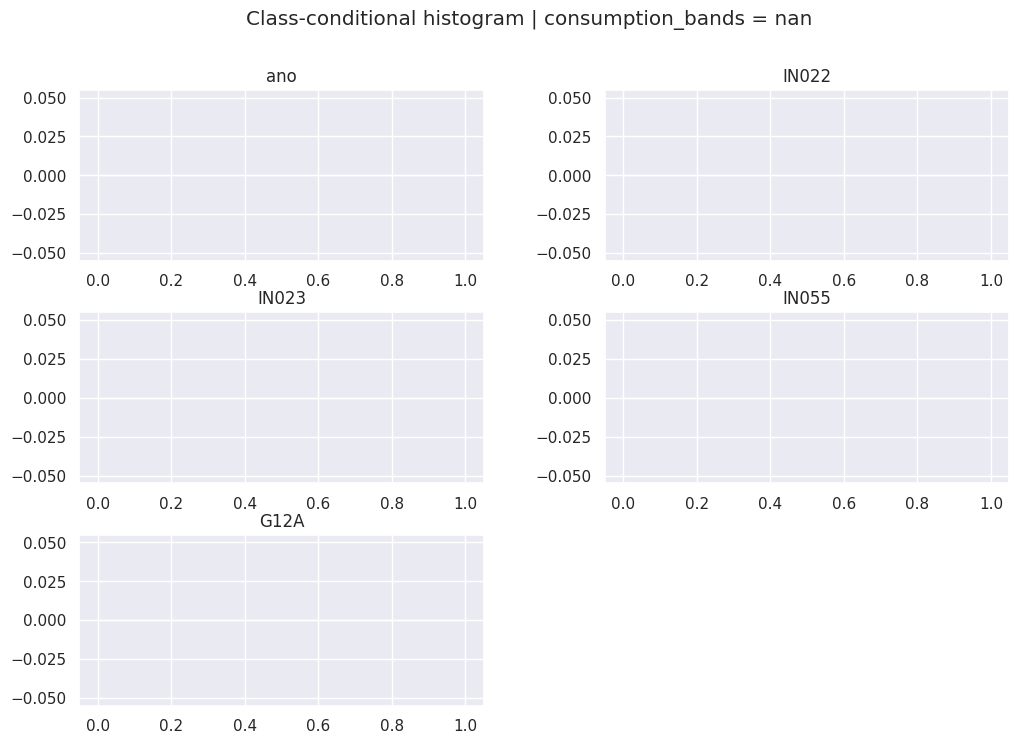

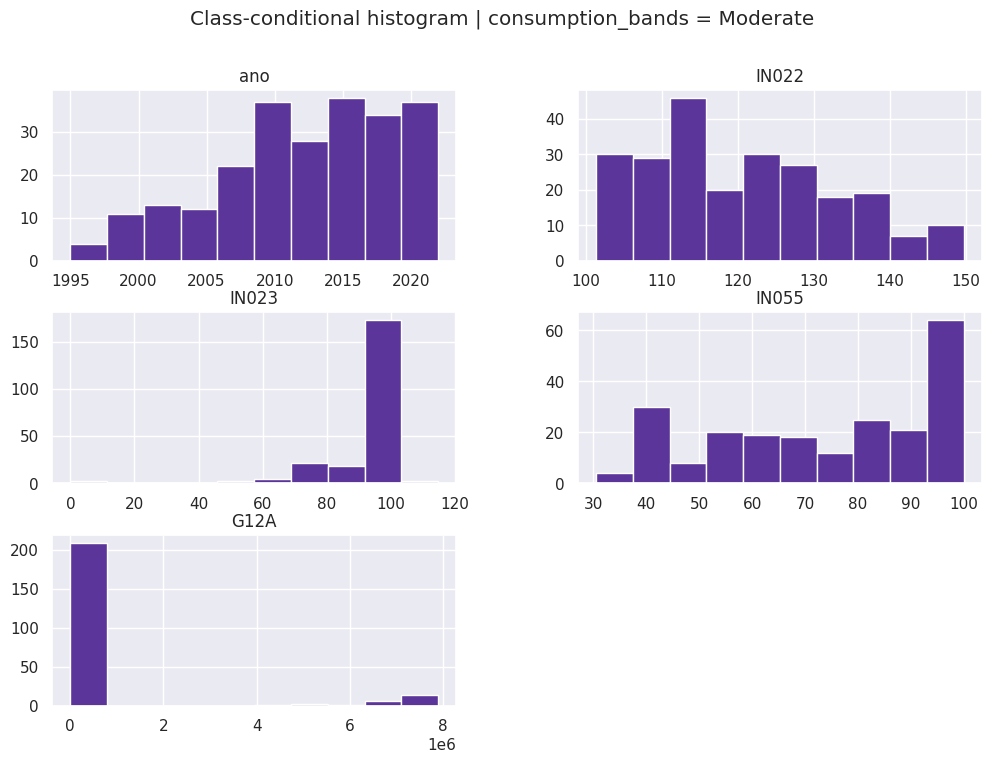

In [24]:
col = "consumption_bands"
for category in df[col].unique():
    class_conditional_analysis(df, col, category)

# 4. Perform an unconditional bi-variate analysis of the predictors.

Perform an unconditional bi-variate analysis of the predictors. Specifically, you must plot the scatter plots between all pairs of predictors. For each point (observation), use colours or symbols to indicate the associated class label. Investigate the existence of potential relationships between pairs of predictors and the presence of potential outliers.


# 5. Perform an unconditional multi-variate analysis of the predictors.

Perform an unconditional multi-variate analysis of the predictors. Specifically, you must perform a principal components analysis of the predictors, for the sake of visualisation, retain only the first two principal components (those associated with the two largest eigenvalues) and plot the scatter plot of the projected observations. Again, for each projected point (observation) you must use colours or symbols to indicate the associated class label. [Remember to perform the necessary preprocessing of the data]